<a href="https://colab.research.google.com/github/yohanesnuwara/reservoir-engineering/blob/master/Unit%207%20Introduction%20to%20Well-Test%20Analysis/notebook/7_problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
!git clone https://www.github.com/yohanesnuwara/reservoir-engineering

Cloning into 'reservoir-engineering'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (90/90), done.
remote: Total 626 (delta 36), reused 0 (delta 0), pack-reused 535
Receiving objects: 100% (626/626), 2.79 MiB | 2.60 MiB/s, done.
Resolving deltas: 100% (259/259), done.


In [0]:
import os, sys
sys.path.append('/content/reservoir-engineering/Unit 7 Introduction to Well-Test Analysis/functions')

## Problem 7.1 Constant-Rate Drawdown Test

Text(0, 0.5, 'Pressure (psia)')

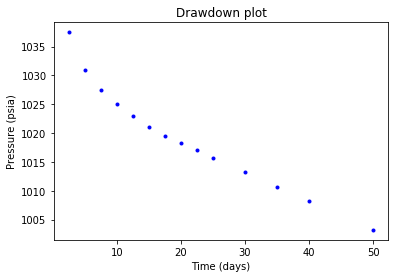

In [61]:
"Task. determine permeability k and initial pressure pi"

# known: data is a drawdown test from limited reservoir
poro = 0.2
h = 20 # ft
rw = 0.25 # ft
qB = 50 # rate-Bo, unit in RB/d
mu_oil = 5 # cp
ct = 18E-06 # psi^-1
s = 0 # assuming skin factor 0

# load data
data1 = pd.read_csv('/content/reservoir-engineering/Unit 7 Introduction to Well-Test Analysis/data/Table 7.12-Reservoir Parameters and Pressure Data Problem 7.1 rev.csv')
plt.plot(data1.t, data1.p, '.', color='blue')
plt.title("Drawdown plot")
plt.xlabel("Time (days)"); plt.ylabel("Pressure (psia)")

From this plot, we could conclude the type of well-test is **constant-rate flow test**. We guess the `index` first, similar to Example 7.1

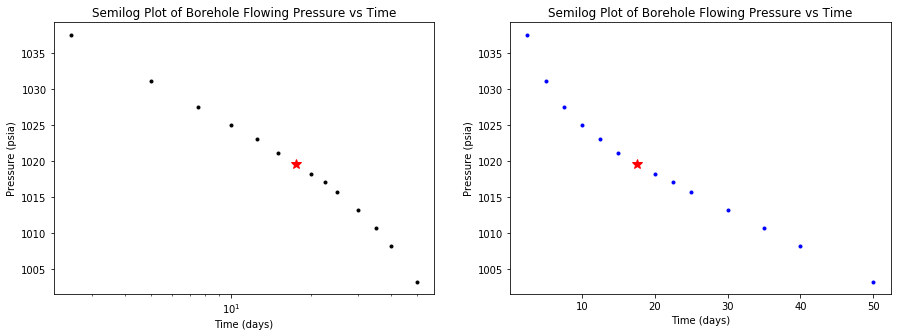

In [54]:
# guess index that mark LTR and MTR for linear region
index = 6

# semilog plot
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.semilogx(data1.t, data1.p, '.', color='black')
plt.title("Semilog Plot of Borehole Flowing Pressure vs Time")
plt.xlabel("Time (days)"); plt.ylabel("Pressure (psia)")

plt.semilogx(data1.t[index], data1.p[index], '*', color='red', ms=10)

# normal plot
plt.subplot(1, 2, 2)
plt.plot(data1.t, data1.p, '.', color='blue')
plt.title("Semilog Plot of Borehole Flowing Pressure vs Time")
plt.xlabel("Time (days)"); plt.ylabel("Pressure (psia)")

plt.plot(data1.t[index], data1.p[index], '*', color='red', ms=10)

In [0]:
def xy_plot_constant_rate(dataframe, index):
  "code to determine slope and intercept of MTR semilog and LTR normal plot, and finite acting time"
  "input is DATAFRAME"

  # time to reach finite-acting (LTR)
  t_finite_acting = dataframe.t[index]

  # MTR region to calculate for permeability
  df1 = dataframe.iloc[:index+1, :] # cut dataframe from index 0 to index of end of straight line
  if df1.t[0] == 0:
    dff1 = df1.drop(df1.index[0]) # drop the first row with time=0, because when log operation is underway, log(0) = indefinite
  else:
    dff1 = df1
  x1 = np.log(np.array(dff1.t))
  y1 = np.array(dff1.p)

  # LTR region to calculate for skin factor
  dff2 = dataframe.iloc[index:, :] # cut dataframe from index of start of straight line to the last index
  x2 = np.array(dff2.t)
  y2 = np.array(dff2.p)

  # title and labels for semilog plot of MTR and LTR
  title1 = "Semilog Plot of Borehole Flowing Pressure vs Time"
  title2 = "Normal Plot of Borehole Flowing Pressure vs Time"
  x1label = "Time (hours)"; x2label = x1label
  y1label = "Flowing Pressure (psia)"; y2label = y1label

  return(x1, y1, x2, y2, t_finite_acting)

x1, y1, x2, y2, t_finite_acting  = xy_plot_constant_rate(data1, index)

`x1` and `y1` are axes of **Plot 1: the Semilog Plot MTR**, `x2` and `y2` are axes of **Plot 2: the Normal Plot LTR**. Linear regression is done to each values of `x` and `y`'s to find each **slope `m`** and **intercept `c`**.

In [56]:
def regression(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 

# slope and intercept of Plot 1
c1, m1 = regression(x1, y1)
m1_cycle = m1 * np.log(10)
# slope and intercept of Plot 2
c2, m2 = regression(x2, y2)
m2_cycle = m2 * np.log(10)

print("Time to reach finite-acting or LTR region approx.:", t_finite_acting, "days")
print("Slope of semilog plot of MTR linear region:", m1, "psi/day, or:", m1_cycle, "psi/cycle")
print("Pressure intercept of semilog plot of MTR linear region:", c1, "psia")
print("Slope of normal plot of LTR linear region:", m2, "psi/day")
print("Pressure intercept of normal plot of LTR linear region:", c1, "psia")

Time to reach finite-acting or LTR region approx.: 17.5 days
Slope of semilog plot of MTR linear region: -9.152190048218081 psi/day, or: -21.07369637327541 psi/cycle
Pressure intercept of semilog plot of MTR linear region: 1045.8894807701326 psia
Slope of normal plot of LTR linear region: -0.5011594202898888 psi/day
Pressure intercept of normal plot of LTR linear region: 1045.8894807701326 psia


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  from ipykernel import kernelapp as app


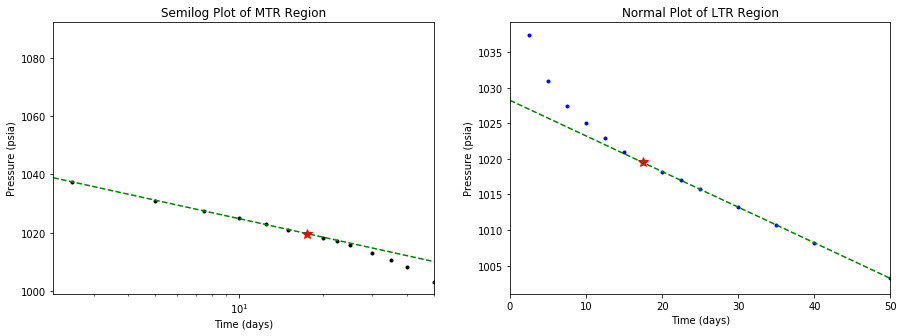

In [57]:
# straight line equation on MTR semilog plot
x_reg1 = np.arange(0.01, 51, 0.1)
y_reg1 = m1_cycle * np.log10(x_reg1) + c1

# straight line equation on LTR normal plot
x_reg2 = np.arange(0.01, 51, 0.1)
y_reg2 = m2 * x_reg2 + c2

# plot regression line on semilog plot
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.semilogx(data1.t, data1.p, '.', color='black')
plt.title("Semilog Plot of MTR Region")
plt.xlabel("Time (days)"); plt.ylabel("Pressure (psia)")
plt.xlim(0, 50)

plt.semilogx(data1.t[index], data1.p[index], '*', color='red', ms=10)

plt.semilogx(x_reg1, y_reg1, '--', color='g', ms=0.5)

# plot regression line on normal plot
plt.subplot(1, 2, 2)
plt.plot(data1.t, data1.p, '.', color='blue')
plt.title("Normal Plot of LTR Region")
plt.xlabel("Time (days)"); plt.ylabel("Pressure (psia)")
plt.xlim(0, 50)

plt.plot(data1.t[index], data1.p[index], '*', color='red', ms=10)

plt.plot(x_reg2, y_reg2, '--', color='g', ms=0.5)

In [58]:
"calculate permeability k"

def perm_welltest(m, mu_oil, h, q, Bo, qB):
  "Calculate permeability from well-test analysis"
  # all inputs are in OILFIELD UNITS, result in MILIDARCIES
  # input q = 0 and Bo = 0 if both are UNKNOWN, but rate-Bo is known (usually data presented in rate-Bo)
  # input qB = 0 if both q and Bo are KNOWN
  # input h = 0 if h is unknown, then permeability-factor (kh) will be calculated
  # m: slope of plot
  # c: intercept of plot

  if h == 0:
    if q == 0 and Bo == 0:
      kh = - (162.6 * qB * mu_oil) / m # perm factor (in mD-ft)
      k = "None"
    if qB == 0:
      kh = - (162.6 * q * Bo * mu_oil) / m # perm factor (in mD-ft)
      k = "None"
  else:
    if q == 0 and Bo == 0:
      k = - (162.6 * qB * mu_oil) / (m * h) # perm (in mD)
      kh = "None"
    if qB == 0:
      k = - (162.6 * q * Bo * mu_oil) / (m * h) # perm (in mD)
      kh = "None"
  return(k, kh)

k, kh = perm_welltest(m1_cycle, mu_oil, h, 0, 0, qB) # q=0, Bo=0, since qB is known
print("Permeability calculated:", k, "mD")

"calculate initial reservoir pressure pi, assuming skin factor s=0"

b1hr = m2 * 1 + c2 # pressure at 1 hour

from scipy.optimize import fsolve
def f(pi):
  f1 = 1.1513 * (((pi - b1hr) / -m1_cycle) - np.log10(k / (poro * mu_oil * ct * (rw**2))) + 3.2275) - s
  return(f1)

pi = fsolve(f, 1000)
print("Reservoir initial pressure assuming skin factor is 0:", pi, "psia")

Permeability calculated: 96.4472470324434 mD
Reservoir initial pressure assuming skin factor is 0: [1126.91129517] psia


### **BONUS**: Determine reservoir size and pore volume

In [0]:
def reservoir_size(m_star, poro, h, ct, q, Bo, qB):
  "Calculate reservoir size from CONSTANT-RATE and FINITE-BUILDUP TESTS"
  # all inputs are in OILFIELD UNITS, result in ft
  # input q = 0 and Bo = 0 if both are UNKNOWN, but rate-Bo is known (usually data presented in rate-Bo)
  # input qB = 0 if both q and Bo are KNOWN
  # input h = 0 if h is unknown, then permeability-factor (kh) will be calculated
  # m_star: slope of plot, m*

  m_star = np.abs(m_star)
  if q == 0 and Bo == 0:
    re = np.sqrt((0.07447 * qB) / (poro * h * ct * m_star))
  if qB == 0:
    re = np.sqrt((0.07447 * q * Bo) / (poro * h * ct * m_star))
  return(re)

re = reservoir_size(m2, poro, h, ct, 0, 0, qB) # q=0, Bo=0, data is in qB
print("Reservoir size calculated:", re, "ft")

def reservoir_pv(m_star, ct, q, Bo, qB):
  "Calculate reservoir pore volume from CONSTANT-RATE and FINITE-BUILDUP TESTS"
  # all inputs are in OILFIELD UNITS, result in ft
  # input q = 0 and Bo = 0 if both are UNKNOWN, but rate-Bo is known (usually data presented in rate-Bo)
  # input qB = 0 if both q and Bo are KNOWN
  # input h = 0 if h is unknown, then permeability-factor (kh) will be calculated
  # m_star: slope of plot, m*

  m_star = np.abs(m_star)
  if q == 0 and Bo == 0:
    vp = (0.23395 * qB) / (ct * m_star)
  if qB == 0:
    vp = (0.23395 * q * Bo) / (ct * m_star)
  return(vp)

vp = reservoir_pv(m2, ct, 0, 0, qB) # q=0, Bo=0, data is in qB
print("Reservoir pore volume calculated:", vp / 1E+06, "million cubic ft")

Reservoir size calculated: 321.2339823988792 ft
Reservoir pore volume calculated: 1.296715346057364 million cubic ft


## Problem 7.2 Multirate Drawdown Test

Text(0, 0.5, 'Rate-Bo (RB/day)')

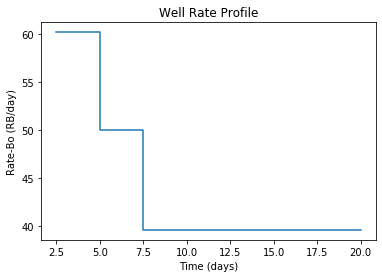

In [14]:
"Task. determine k and s from a multirate drawdown test"

# known: the same well as in Problem 7.1

poro = 0.2
h = 20 # ft
rw = 0.25 # ft
qB = 50 # rate-Bo, unit in RB/d
mu_oil = 5 # cp
ct = 18E-06 # psi^-1

time = [2.5, 5, 7.5, 15, 20]
pi_minus_pwf = [149, 130.8, 108, 110.8, 112.4]
qB = [60.2, 50, 39.6, 39.6, 39.6]

# plot well rate profile

time_step = [2.5, 5, 5, 7.5, 7.5, 15, 20]
qB_step = [60.2, 60.2, 50, 50, 39.6, 39.6, 39.6]

plt.plot(time_step, qB_step)
plt.title("Well Rate Profile")
plt.xlabel("Time (days)"); plt.ylabel("Rate-Bo (RB/day)")

Be careful with type of data as input. In this problem, the pressure is already in form of `pi - pwf`, however our function `xy_plot_multirate` takes `pwf` as input. So, function should be **modified**.

Text(0, 0.5, '(pi-pwf)/qn, psi-D/STB')

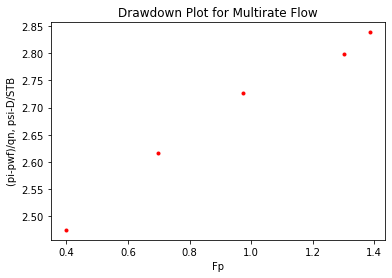

In [15]:
time = np.array([2.5, 5, 7.5, 15, 20])

time_change = np.array([5, 7.5]) # time when rate changes
qB_change = np.array([60.2, 50, 39.6]) # rate period

def xy_plot_multirate(t, pi_minus_pwf, time_change, q): 
  "this program only for TWO RATES changing. Changes of more than two can't use this program, thus must be extended and modified"
  # time_change: time series when rate changes (time1, time2)
  # rate_change: rates at time (rate1, rate2, rate3)

  Fp_arr = []
  y_arr = []

  for i in range(len(t)):
    if t[i] < time_change[0]:
      # first rate
      y = pi_minus_pwf[i] / q[0] # the y axis (pi-pwf)/qn
      Fp = ((q[0] - 0) / q[0]) * np.log10(t[i] - 0) # the x axis, plotting function
    if t[i] == time_change[0]:
      # first rate
      y = pi_minus_pwf[i] / q[1] # the y axis (pi-pwf)/qn
      Fp = ((q[0] - 0) / q[0]) * np.log10(t[i] - 0) # the x axis, plotting function
    if t[i] > time_change[0] and t[i] < time_change[1]:
      # second rate
      y = pi_minus_pwf[i] / q[1] # the y axis (pi-pwf)/qn
      Fp = (((q[1] - q[0]) / q[1]) * np.log10(t[i] - time_change[0])) + (((q[0] - 0) / q[1]) * np.log10(t[i] - 0)) # the x axis, plotting function
    if t[i] == time_change[1]:
      # second rate
      y = pi_minus_pwf[i] / q[2] # the y axis (pi-pwf)/qn
      Fp = (((q[1] - q[0]) / q[1]) * np.log10(t[i] - time_change[0])) + (((q[0] - 0) / q[1]) * np.log10(t[i] - 0)) # the x axis, plotting function
    if t[i] > time_change[1]:
      # third rate
      y = pi_minus_pwf[i] / q[2] # the y axis (pi-pwf)/qn
      Fp = (((q[2] - q[1]) / q[2]) * np.log10(t[i] - time_change[1])) + (((q[1] - q[0]) / q[2]) * np.log10(t[i] - time_change[0])) + (((q[0] - 0) / q[2]) * np.log10(t[i] - 0)) # the x axis, plotting function
  
    Fp_arr.append(float(Fp))
    y_arr.append(float(y))

  return(Fp_arr, y_arr)

Fp_arr, y_arr = xy_plot_multirate(time, pi_minus_pwf, time_change, qB_change)
plt.plot(Fp_arr, y_arr, '.', color='r')
plt.title('Drawdown Plot for Multirate Flow')
plt.xlabel('Fp'); plt.ylabel('(pi-pwf)/qn, psi-D/STB')

In [0]:
x = np.array(Fp_arr)
y = np.array(y_arr)
c, m = regression(x, y)
print("Slope of drawdown plot:", m)
print("Intercept of drawdown plot:", c, "psi-D/STB")

Slope of drawdown plot: 0.3529850823378056
Intercept of drawdown plot: 2.355140071911612 psi-D/STB


Text(0, 0.5, '(pi-pwf)/qn, psi-D/STB')

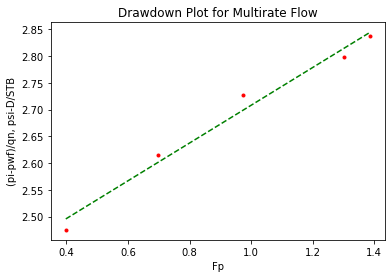

In [0]:
y_reg = m * x + c

plt.plot(Fp_arr, y_arr, '.', color='r')
plt.plot(x, y_reg, '--', color='g')
plt.title('Drawdown Plot for Multirate Flow')
plt.xlabel('Fp'); plt.ylabel('(pi-pwf)/qn, psi-D/STB')

Information is incomplete. Equation to solve for k is: `k = (162.6 * Bo * mu_oil) / (m * h)` (Equation 7.29). `Bo` is not known. `s` depends also on `k`, so `s` (Equation 7.30) cannot be calculated.

## Problem 7.3 Buildup Test

To solve buildup analysis using 2 methods:
* **Infinite-acting buildup theory** (Chapter 7.5)
* **Finite-acting buildup theory** (Chapter 7.7)

### Infinite-acting buildup theory

Text(0, 0.5, 'Pressure (psi)')

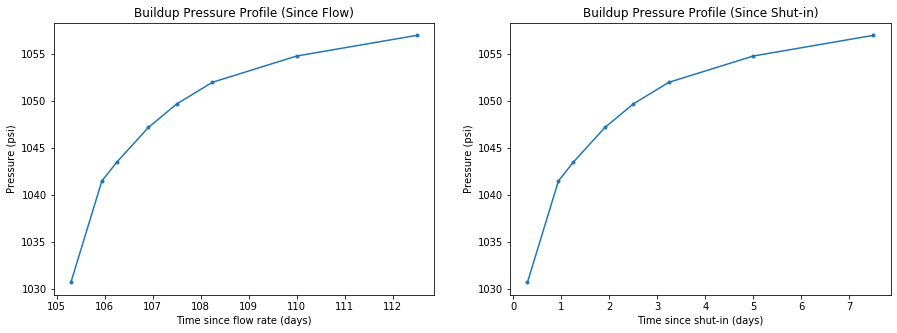

In [0]:
"Task 1. determine permeability k using INFINITE-ACTING BUILDUP THEORY"

data3 = pd.read_csv('/content/reservoir-engineering/Unit 7 Introduction to Well-Test Analysis/data/Table 7.14-Buildup Data Problem 7.3.csv')

time_flow = 105 # in days, flow for 105 days, then shut-in for build-up
time_since_flow = data3.t + time_flow # convert hours to date

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(time_since_flow, data3.p, '.-')
plt.title('Buildup Pressure Profile (Since Flow)')
plt.xlabel('Time since flow rate (days)'); plt.ylabel('Pressure (psi)')

plt.subplot(1, 2, 2)
plt.plot(data3.t, data3.p, '.-')
plt.title('Buildup Pressure Profile (Since Shut-in)')
plt.xlabel('Time since shut-in (days)'); plt.ylabel('Pressure (psi)')

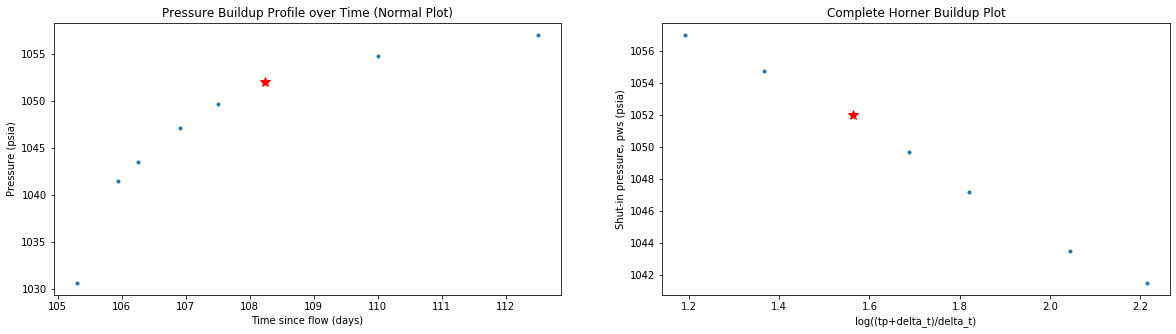

In [0]:
# calculate x Horner axis: log((tp + delta_t) / delta_t)

delta_t = data3.t - data3.t[0]
x_horner = np.log10((time_flow + delta_t) / delta_t)
horner = pd.DataFrame({"Time(hour)": data3.t, "logtime": x_horner, "Shut-in pressure(psia)": data3.p})

"Guess index that separates MTR (infinite acting) and LTR (finite acting)"
index = 5

plt.figure(figsize=(20, 5))

p0 = plt.subplot(1, 2, 1)
p0 = plt.plot(time_since_flow, data3.p, '.')
p0 = plt.title('Pressure Buildup Profile over Time (Normal Plot)')
p0 = plt.xlabel('Time since flow (days)'); plt.ylabel('Pressure (psia)')
p0 = plt.plot(time_since_flow[index], data3.p[index], '*', color='red', ms=10)

# Horner plot

p1 = plt.subplot(1, 2, 2)
p1 = plt.plot(x_horner, data3.p, '.')
p1 = plt.title('Complete Horner Buildup Plot')
p1 = plt.xlabel('log((tp+delta_t)/delta_t)'); plt.ylabel('Shut-in pressure, pws (psia)')
p1 = plt.plot(x_horner[index], data3.p[index], '*', color='red', ms=10)

In [0]:
# cut dataframe from index 0 to index of end of straight line
dfhorner = horner.iloc[index:, :]

# # linear regression to find slope and intercept of a straight line

x = dfhorner.iloc[:, 1]
y = dfhorner.iloc[:, 2]

c, m = regression(x, y)
pi = c # initial pressure equals to intercept c
print("Slope of linear-region Horner plot:", m)
print("Intercept of linear-region Horner plot:", c, "psia")
print("The initial reservoir pressure equals to the intercept:", pi, "psia")

Slope of linear-region Horner plot: -13.469529183069632
Intercept of linear-region Horner plot: 1073.115547476089 psia
The initial reservoir pressure equals to the intercept: 1073.115547476089 psia


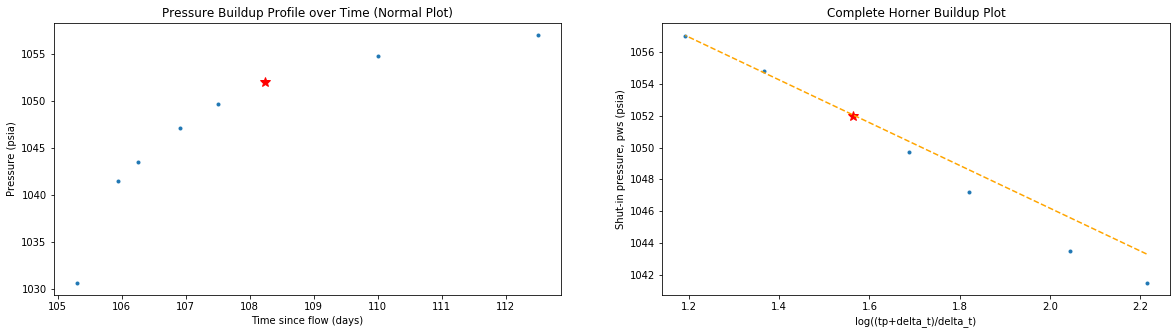

In [0]:
# Plot the regression line

# drop the first row with time=0, because when log operation is underway, log(0) = indefinite
x_cut = horner.drop(horner.index[0])

x_reg = x_cut.iloc[:, 1]
y_reg = m * x_reg + c

plt.figure(figsize=(20, 5))

# Normal plot

p0 = plt.subplot(1, 2, 1)
p0 = plt.plot(time_since_flow, data3.p, '.')
p0 = plt.title('Pressure Buildup Profile over Time (Normal Plot)')
p0 = plt.xlabel('Time since flow (days)'); plt.ylabel('Pressure (psia)')
p0 = plt.plot(time_since_flow[index], data3.p[index], '*', color='red', ms=10)

# Horner plot

p1 = plt.subplot(1, 2, 2)
p1 = plt.plot(x_horner, data3.p, '.')
p1 = plt.title('Complete Horner Buildup Plot')
p1 = plt.xlabel('log((tp+delta_t)/delta_t)'); plt.ylabel('Shut-in pressure, pws (psia)')
p1 = plt.plot(x_horner[index], data3.p[index], '*', color='red', ms=10)

p1 = plt.plot(x_reg, y_reg, '--', color='orange')

In [0]:
# calculate permeability

# known: the same well as in Problem 7.1

poro = 0.2
h = 20 # ft
rw = 0.25 # ft
qB = 50 # rate-Bo, unit in RB/d
mu_oil = 5 # cp
ct = 18E-06 # psi^-1

k, kh = perm_welltest(m, mu_oil, h, 0, 0, qB) # q=0, Bo=0, only qB is known
print("Permeability calculated from buildup analysis using infinite-acting theory:", k, "mD")

Permeability calculated from buildup analysis using infinite-acting theory: 150.89614286999188 mD


### Finite-acting buildup theory

Text(0, 0.5, 'pws-m*delta_t (psia)')

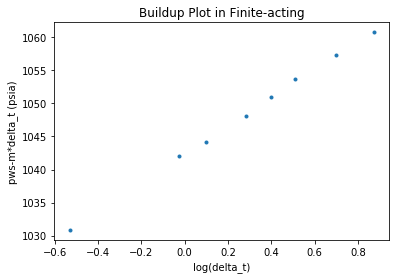

In [0]:
"Task 2. determine permeability k using FINITE-ACTING BUILDUP THEORY"

# known: the similar well in Problem 7.1, it means we can use the DRAWDOWN PRESSURE RATE as m* and use Slider's method

m_star = m2 # in psi/day

# buildup plot
x = np.log10(data3.t)
y = data3.p - (m_star * data3.t)

plt.plot(x, y, '.')
plt.title('Buildup Plot in Finite-acting')
plt.xlabel('log(delta_t)'); plt.ylabel('pws-m*delta_t (psia)')

In [0]:
# linear regression to find slope m and intercept C
c, m = regression(x, y)
pi = c # initial pressure equals to intercept c5
print("Slope of buildup plot (m):", m, "psi/cycle")
print("Intercept of buildup plot (C):", c, "psia")

Slope of buildup plot (m): 21.399138084135174 psi/cycle
Intercept of buildup plot (C): 1042.3104775730383 psia


Text(0, 0.5, 'pws-m*delta_t (psia)')

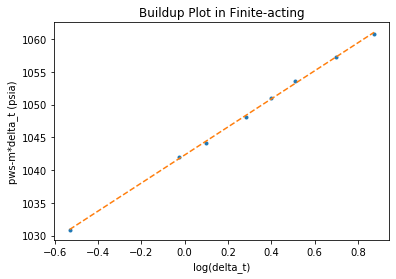

In [0]:
# plot regression line

x_reg = x
y_reg = m * x_reg + c

plt.plot(x, y, '.')
plt.plot(x_reg, y_reg, '--')
plt.title('Buildup Plot in Finite-acting')
plt.xlabel('log(delta_t)'); plt.ylabel('pws-m*delta_t (psia)')

In [0]:
# calculate permeability-factor
k = - (162.6 * qB * mu_oil) / (m * h)
print("Permeability calculated from buildup analysis using finite-acting theory:", np.abs(k), "mD")

Permeability calculated from buildup analysis using finite-acting theory: 94.98046098907359 mD


Permeability calculated using **infinite-acting buildup analysis** is 150 mD, and using **finite-acting buildup analysis** is 95 mD. So, permeability in range 95 to 150 mD. 

## Problem 7.4 Buildup Test

To analyse buildup test, using Horner plot (infinite-acting approach), `tp` is needed. In the book, `tp` is not known. So, `tp` is obtained from the original copy of [Raghavan (1976) paper](https://github.com/yohanesnuwara/reservoir-engineering/blob/master/Papers/Raghavan%20-%201976%20-%20Well%20Test%20Analysis_Wells%20Producing%20by%20Solution%20Gas%20Drive.pdf), which this Problem 7.4 is based on: `tp = 60 days`

Text(0, 0.5, 'Pressure (psi)')

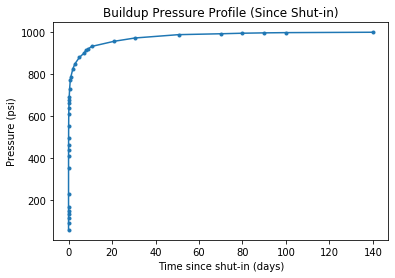

In [0]:
"Task. determine permeability k and skin factor s"

# known
poro = 0.119
h = 25 # ft
qB = 25 # RB/d, q and Bo are not informed
mu_oil = 1.93 # cp
rw = 0.25 # ft
ct = 416.8E-6

# flow/production time is not known in the book, but get the value from original copy of Raghavan (1976) paper
time_flow = 60

# conversion: NONE, all units already in OILFIELD UNITS

data4 = pd.read_csv('/content/reservoir-engineering/Unit 7 Introduction to Well-Test Analysis/data/Table 7.15-Reservoir Parameters and Pressure Buildup Data Problem 7.4.csv')

plt.plot(data4.t, data4.p, '.-')
plt.title('Buildup Pressure Profile (Since Shut-in)')
plt.xlabel('Time since shut-in (days)'); plt.ylabel('Pressure (psi)')

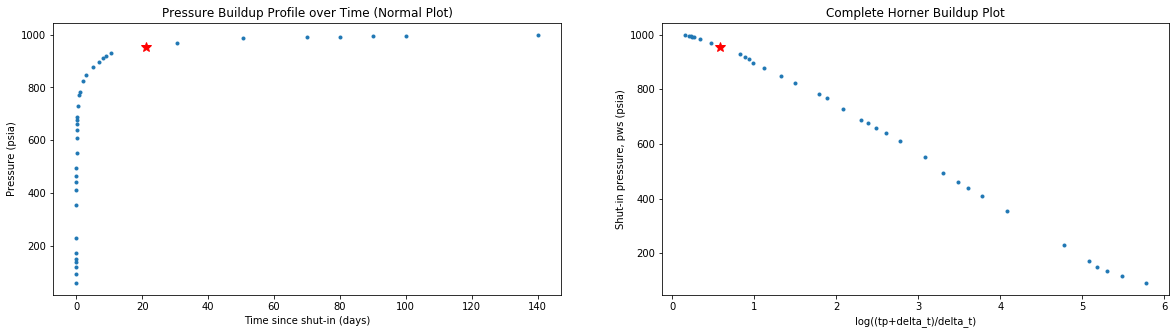

In [0]:
# calculate x Horner axis: log((tp + delta_t) / delta_t)

delta_t = data4.t - data4.t[0]
x_horner = np.log10((time_flow + delta_t) / delta_t)
horner = pd.DataFrame({"Time(hour)": data4.t, "logtime": x_horner, "Shut-in pressure(psia)": data4.p})

"Guess index that separates MTR (infinite acting) and LTR (finite acting)"
index = 28

plt.figure(figsize=(20, 5))

p0 = plt.subplot(1, 2, 1)
p0 = plt.plot(data4.t, data4.p, '.')
p0 = plt.title('Pressure Buildup Profile over Time (Normal Plot)')
p0 = plt.xlabel('Time since shut-in (days)'); plt.ylabel('Pressure (psia)')
p0 = plt.plot(data4.t[index], data4.p[index], '*', color='red', ms=10)

# Horner plot

p1 = plt.subplot(1, 2, 2)
p1 = plt.plot(x_horner, data4.p, '.')
p1 = plt.title('Complete Horner Buildup Plot')
p1 = plt.xlabel('log((tp+delta_t)/delta_t)'); plt.ylabel('Shut-in pressure, pws (psia)')
p1 = plt.plot(x_horner[index], data4.p[index], '*', color='red', ms=10)

In [0]:
# cut dataframe from index 0 to index of end of straight line
dfhorner = horner.iloc[index:, :]

# # linear regression to find slope and intercept of a straight line

x = dfhorner.iloc[:, 1]
y = dfhorner.iloc[:, 2]

c, m = regression(x, y)
pi = c # initial pressure equals to intercept c
print("Slope of linear-region Horner plot:", m)
print("Intercept of linear-region Horner plot:", c, "psia")
print("The initial reservoir pressure equals to the intercept:", pi, "psia")

Slope of linear-region Horner plot: -100.81135370088552
Intercept of linear-region Horner plot: 1016.3941764833139 psia
The initial reservoir pressure equals to the intercept: 1016.3941764833139 psia


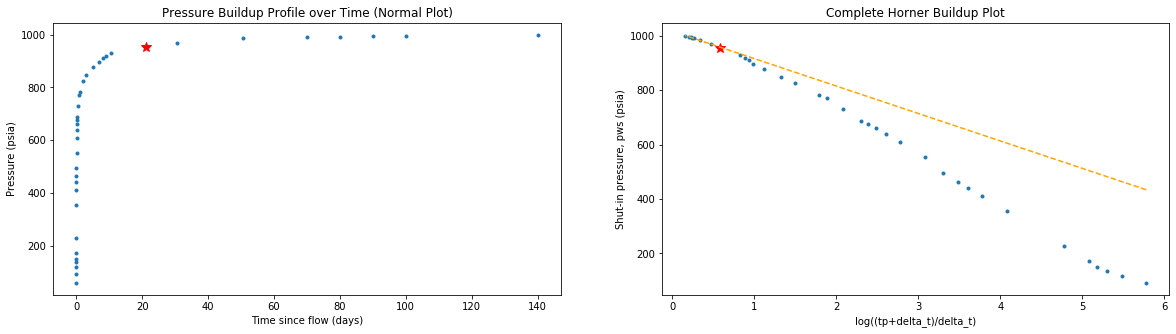

In [0]:
# Plot the regression line

# drop the first row with time=0, because when log operation is underway, log(0) = indefinite
x_cut = horner.drop(horner.index[0])

x_reg = x_cut.iloc[:, 1]
y_reg = m * x_reg + c

plt.figure(figsize=(20, 5))

# Normal plot

p0 = plt.subplot(1, 2, 1)
p0 = plt.plot(data4.t, data4.p, '.')
p0 = plt.title('Pressure Buildup Profile over Time (Normal Plot)')
p0 = plt.xlabel('Time since flow (days)'); plt.ylabel('Pressure (psia)')
p0 = plt.plot(data4.t[index], data4.p[index], '*', color='red', ms=10)

# Horner plot

p1 = plt.subplot(1, 2, 2)
p1 = plt.plot(x_horner, data4.p, '.')
p1 = plt.title('Complete Horner Buildup Plot')
p1 = plt.xlabel('log((tp+delta_t)/delta_t)'); plt.ylabel('Shut-in pressure, pws (psia)')
p1 = plt.plot(x_horner[index], data4.p[index], '*', color='red', ms=10)

p1 = plt.plot(x_reg, y_reg, '--', color='orange')

In [0]:
# calculate permeability

k, kh = perm_welltest(m, mu_oil, h, 0, 0, qB) # q=0, Bo=0, only qB is known
print("Permeability calculated from buildup analysis using infinite-acting theory:", k, "mD")

Permeability calculated from buildup analysis using infinite-acting theory: 3.112923182552636 mD


## Problem 7.5 Multirate Drawdown Test

Text(0, 0.5, 'Pressure (psia)')

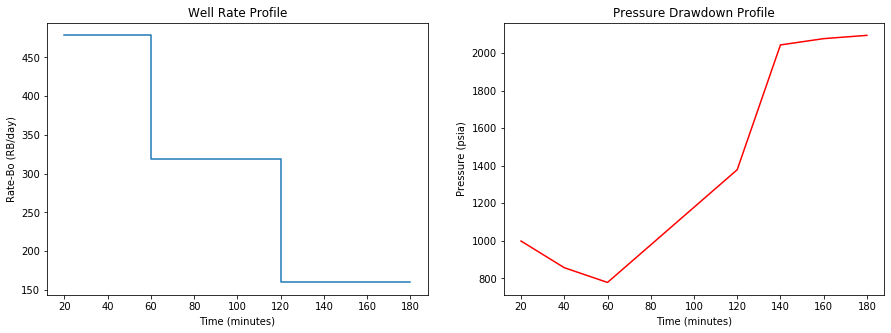

In [63]:
"Task. permeability-thickness product (kh) from a multirate drawdown test"

# known: the same well as in Problem 7.1

mu_oil = 0.6 # cp

data5_ori = pd.read_csv('/content/reservoir-engineering/Unit 7 Introduction to Well-Test Analysis/data/Table 7.16-Multirate Drawdown Test Data Problem 7.5.csv')

# cut the first row (index=0) where time=0, because it has no information of rate

data5 = data5_ori.drop(data5_ori.index[0])

# interpret from data and plot well rate profile

pi = data5_ori.p[0] # initial pressure is pressure at time 0 minutes, 3000 psia

time_step = [20, 40, 60, 60, 120, 120, 140, 160, 180]
qB_step = [478.5, 478.5, 478.5, 319, 319, 159.5, 159.5, 159.5, 159.5]

plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.plot(time_step, qB_step)
plt.title("Well Rate Profile")
plt.xlabel("Time (minutes)"); plt.ylabel("Rate-Bo (RB/day)")

# plot pressure data
plt.subplot(1,2,2)
plt.plot(data5.t, data5.p, 'r')
plt.title("Pressure Drawdown Profile")
plt.xlabel("Time (minutes)"); plt.ylabel("Pressure (psia)")

Text(0, 0.5, '(pi-pwf)/qn, psi-D/STB')

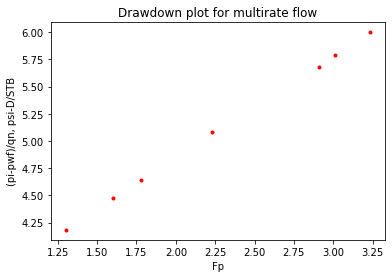

In [64]:
time = np.array(data5.t)
pwf = np.array(data5.p) # flowing pressure

time_change = np.array([60, 120]) # time when rate changes
q = np.array([478.5, 319, 159.5]) # rate period

def xyplot_multirate(time, pwf, q, time_change, pi):

  "Create x and y for Horner Plot of Multirate Drawdown Analysis, Limited to only RATE CHANGING TWICE"

  # time: time series in the multirate well test data (NUMPY FORMAT, convert first to np.array(...))
  # pwf: flowing pressure series in the multirate well test data (NUMPY FORMAT, convert first to np.array(...))
  # both time and pwf must have SAME DIMENSION
  # q: rate change (have length of array: 3)
  # time_changing: time when rate changes (have length of array: 2)
  # pi: initial pressure, usually available in multirate data as PRESSURE WHEN TIME = 0.

  y_arr = []
  Fp_arr = []

  for i in range(len(time)):
    if time[i] <= time_change[0]:
      # first rate
      y = (pi - pwf[i]) / q[0] # the y axis (pi-pwf)/qn
      Fp = ((q[0] - 0) / q[0]) * np.log10(time[i] - 0) # the x axis, plotting function
    if time[i] > time_change[0] and time[i] <= time_change[1]:
      # second rate
      y = (pi - pwf[i]) / q[1] # the y axis (pi-pwf)/qn
      Fp = (((q[1] - q[0]) / q[1]) * np.log10(time[i] - time_change[0])) + (((q[0] - 0) / q[1]) * np.log10(time[i] - 0)) # the x axis, plotting function
    if time[i] > time_change[1]:
      # third rate
      y = (pi - pwf[i]) / q[2] # the y axis (pi-pwf)/qn
      Fp = (((q[2] - q[1]) / q[2]) * np.log10(time[i] - time_change[1])) + (((q[1] - q[0]) / q[2]) * np.log10(time[i] - time_change[0])) + (((q[0] - 0) / q[2]) * np.log10(time[i] - 0)) # the x axis, plotting function
    
    y_arr.append(float(y))
    Fp_arr.append(float(Fp))
  
  return(Fp_arr, y_arr)

x, y = xyplot_multirate(time, pwf, q, time_change, pi)

# plot result of y and Fp: drawdown plot

plt.plot(x, y, '.', color='r')
plt.title('Drawdown plot for multirate flow')
plt.xlabel('Fp'); plt.ylabel('(pi-pwf)/qn, psi-D/STB')

Slope of drawdown plot: 0.9332902488807595
Intercept of drawdown plot: 2.9805209035879545 psi-D/STB


Text(0, 0.5, '(pi-pwf)/qn, psi-D/STB')

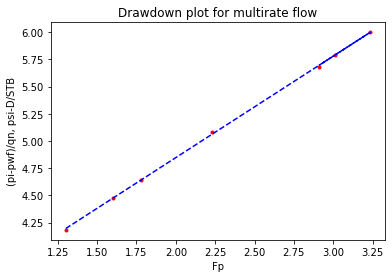

In [65]:
# regression

x = np.array(x)
y = np.array(y)

c, m = regression(x, y)
print("Slope of drawdown plot:", m)
print("Intercept of drawdown plot:", c, "psi-D/STB")

# plot regression
x_reg = x
y_reg = m * x_reg + c

plt.plot(x, y, '.', color='red')
plt.plot(x_reg, y_reg, '--', color='blue')
plt.title('Drawdown plot for multirate flow')
plt.xlabel('Fp'); plt.ylabel('(pi-pwf)/qn, psi-D/STB')

Information is incomplete. Equation to solve for k is: `k = (162.6 * Bo * mu_oil) / (m * h)` (Equation 7.29). `Bo` is not known. `s` depends also on `k`, so `s` (Equation 7.30) cannot be calculated.

## Problem 7.6 Constant-Rate Buildup Test (Infinite-Acting Reservoir)

`tp` is not known.

Text(0, 0.5, 'pws-pwf (psia)')

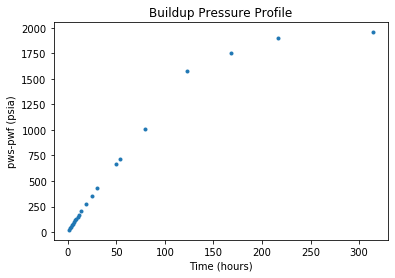

In [76]:
"Task. determine k and s from constant-rate buildup test"

# known
poro = 0.09
Bo = 1.5 # RB/STB
h = 20 # ft
rw = 0.2 # ft
q = 12 # STB/d
ct = 10E-6 # psi^-1
mu_oil = 0.7 # cp

# conversion: NONE, already in oilfield units

data6 = pd.read_csv('/content/reservoir-engineering/Unit 7 Introduction to Well-Test Analysis/data/Table 7.17-Reservoir Parameters and Pressure-Buildup Data Problem 7.6.csv')

# data in time, and pws-pwf
plt.plot(data6.t, data6.pws_min_pwf, '.')
plt.title('Buildup Pressure Profile')
plt.xlabel('Time (hours)'); plt.ylabel('pws-pwf (psia)')

## Problem 7.7 Buildup Test (Finite-Acting Well)

Text(0, 0.5, 'Shut-in pressure (psia)')

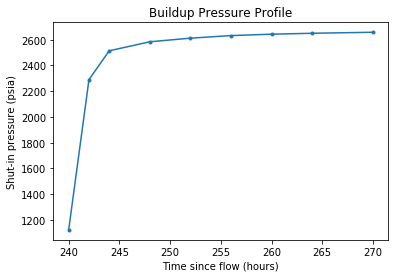

In [160]:
"Task. determine porosity/compressibility product, pore volume, permeability, skin factor"

# known
q = 280 # STB/d
Bo = 1.31 # RB/STB
mu_oil = 2 # cp
rw = 0.333 # ft
h = 40 # ft
tp = 10 # days
m_star = 24 # psi/d
re = 660 # ft

# conversion: NONE, already in oilfield units

data7 = pd.read_csv('/content/reservoir-engineering/Unit 7 Introduction to Well-Test Analysis/data/Table 7.18-Reservoir Parameters and Pressure-Buildup Data Problem 7.7.csv')

tp = 10 * 24 # convert from day to hour
time_since_flow = data7.t + tp # in hours

plt.plot(time_since_flow, data7.pws, '.-')
plt.title('Buildup Pressure Profile')
plt.xlabel('Time since flow (hours)'); plt.ylabel('Shut-in pressure (psia)')

,t,pws
1,2,2290
2,4,2514
3,8,2584
4,12,2612
5,16,2632
6,20,2643
7,24,2650
8,30,2658


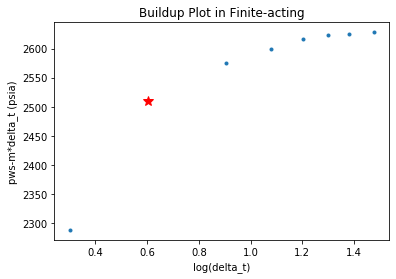

In [161]:
# cut the first row (index=0) where time=0, because it has no information of rate
data7_cut = data7.drop(data7.index[0])

# convert m_star from psi/d to psi/hour
m_star = m_star / 24

# buildup plot
x = np.log10(data7_cut.t)
y = data7_cut.pws - (m_star * data7_cut.t)

plt.plot(x, y, '.')
plt.title('Buildup Plot in Finite-acting')
plt.xlabel('log(delta_t)'); plt.ylabel('pws-m*delta_t (psia)')

index = 2
plt.plot(x[index], y[index], '*', color='red', ms=10)
data7_cut

In [170]:
# cut 
x_cut = x[index-1:]
y_cut = y[index-1:]

c, m = regression(x_cut, y_cut)

# calculate porosity and compressibility factor from Eq 7.22
poro = (0.07447 * q * Bo) / (m_star * h * ct * (re**2))
ct_factor = poro * ct

# calculate permeability
k, kh = perm_welltest(m, mu_oil, h, q, Bo, qB=0)
k = np.abs(k)

# calculate pore volume

def reservoir_pv(m_star, ct, q, Bo, qB):
  "Calculate reservoir pore volume from CONSTANT-RATE and FINITE-BUILDUP TESTS"
  # all inputs are in OILFIELD UNITS, result in ft
  # input q = 0 and Bo = 0 if both are UNKNOWN, but rate-Bo is known (usually data presented in rate-Bo)
  # input qB = 0 if both q and Bo are KNOWN
  # input h = 0 if h is unknown, then permeability-factor (kh) will be calculated
  # m_star: slope of plot, m*

  m_star = np.abs(m_star)
  if q == 0 and Bo == 0:
    vp = (0.23395 * qB) / (ct * m_star)
  if qB == 0:
    vp = (0.23395 * q * Bo) / (ct * m_star)
  return(vp)

vp = reservoir_pv(24, ct, q, Bo, qB=0)

print("Porosity calculated:", poro)
print("Compressibility factor calculated:", ct_factor, "psi^-1")
print("Permeability calculated:", k, "mD")
print("Reservoir pore volume:", vp, "cubic ft")

Porosity calculated: 0.1567699494949495
Compressibility factor calculated: 1.567699494949495e-06 psi^-1
Permeability calculated: 22.05811659549771 mD
Reservoir pore volume: 357553.5833333333 cubic ft


## Problem 7.9 Injection Drawdown Test

Text(0, 0.5, 'Pressure (psia)')

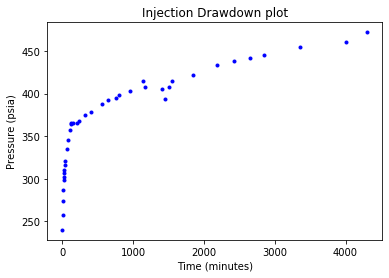

In [199]:
"Task. determine k and s from water injection well-test"

# known
poro = 0.2
h = 25 # ft
rw = 0.563 # ft
qB = 115 # RB/d, rate water*water FVF
mu_w = 1 # cp
ct = 11.3E-06 # psi^-1

# conversion: NONE, already in oilfield units

data9 = pd.read_csv('/content/reservoir-engineering/Unit 7 Introduction to Well-Test Analysis/data/Table 7.19-Reservoir Parameters and Drawdown Injection Data Problem 7.9.csv')

plt.plot(data9.t, data9.p, '.', color='blue')
plt.title("Injection Drawdown plot")
plt.xlabel("Time (minutes)"); plt.ylabel("Pressure (psia)")

Analysis similar to **constant-rate drawdown test**, except the slope is **positive**

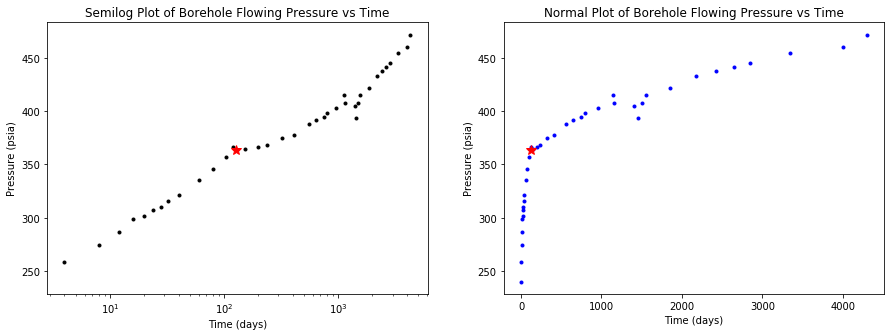

In [200]:
# guess index that mark LTR and MTR for linear region
index = 14

# semilog plot
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.semilogx(data9.t, data9.p, '.', color='black')
plt.title("Semilog Plot of Borehole Flowing Pressure vs Time")
plt.xlabel("Time (days)"); plt.ylabel("Pressure (psia)")

plt.semilogx(data9.t[index], data9.p[index], '*', color='red', ms=10)

# normal plot
plt.subplot(1, 2, 2)
plt.plot(data9.t, data9.p, '.', color='blue')
plt.title("Normal Plot of Borehole Flowing Pressure vs Time")
plt.xlabel("Time (days)"); plt.ylabel("Pressure (psia)")

plt.plot(data9.t[index], data9.p[index], '*', color='red', ms=10)

In [201]:
x1, y1, x2, y2, t_finite_acting  = xy_plot_constant_rate(data9, index)

# slope and intercept of Plot 1
c1, m1 = regression(x1, y1)
m1_cycle = m1 * np.log(10)
# slope and intercept of Plot 2
c2, m2 = regression(x2, y2)
m2_cycle = m2 * np.log(10)

print("Time to reach finite-acting or LTR region approx.:", t_finite_acting, "days")
print("Slope of semilog plot of MTR linear region:", m1, "psi/day, or:", m1_cycle, "psi/cycle")
print("Pressure intercept of semilog plot of MTR linear region:", c1, "psia")
print("Slope of normal plot of LTR linear region:", m2, "psi/day")
print("Pressure intercept of normal plot of LTR linear region:", c1, "psia")

Time to reach finite-acting or LTR region approx.: 128 days
Slope of semilog plot of MTR linear region: 31.42220692597811 psi/day, or: 72.35230525673146 psi/cycle
Pressure intercept of semilog plot of MTR linear region: 209.20748310330242 psia
Slope of normal plot of LTR linear region: 0.025257844082845565 psi/day
Pressure intercept of normal plot of LTR linear region: 209.20748310330242 psia


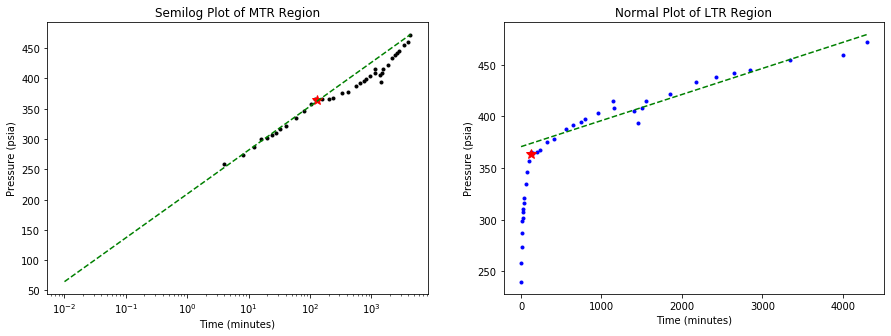

In [202]:
# straight line equation on MTR semilog plot
x_reg1 = np.arange(0.01, 4300, 1)
y_reg1 = m1_cycle * np.log10(x_reg1) + c1

# straight line equation on LTR normal plot
x_reg2 = np.arange(0.01, 4300, 1)
y_reg2 = m2 * x_reg2 + c2

# plot regression line on semilog plot
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.semilogx(data9.t, data9.p, '.', color='black')
plt.title("Semilog Plot of MTR Region")
plt.xlabel("Time (minutes)"); plt.ylabel("Pressure (psia)")

plt.semilogx(data9.t[index], data9.p[index], '*', color='red', ms=10)

plt.semilogx(x_reg1, y_reg1, '--', color='g', ms=0.5)

# plot regression line on normal plot
plt.subplot(1, 2, 2)
plt.plot(data9.t, data9.p, '.', color='blue')
plt.title("Normal Plot of LTR Region")
plt.xlabel("Time (minutes)"); plt.ylabel("Pressure (psia)")

plt.plot(data9.t[index], data9.p[index], '*', color='red', ms=10)

plt.plot(x_reg2, y_reg2, '--', color='g', ms=0.5)

In [203]:
# calculate permeability
k, kh = perm_welltest(m1_cycle, mu_w, h, 0, 0, qB) # q=0, Bo=0, since qB is known
k = np.abs(k)
print("Permeability calculated:", k, "mD")

# calculate skin factor

t1hr = 1 # time at 1 hour
# m2 and c2 are slope and intercept of the second regression line from normal plot
b1hr = m2 * t1hr + c2 

# m (slope) is m from semilog MTR plot, m1_cycle 
s = 1.1513 * (((data9.p[0] - b1hr) / np.abs(m1_cycle)) - np.log10(k / (poro * mu_w * ct * (rw**2))) + 3.2275)

print("Skin factor:", s)

Permeability calculated: 10.337749396456333 mD
Skin factor: -6.60848624849335
